<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">  

<b> <font size='5'>  
ELEC PRICE PREDICTION CAPSTONE:</font>  

<font size='4'>EDA and Data Inspection</font> </b>

<font size='3'>  
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Manu Kalia Project Submission<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; DSI-7-SF<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 15-May-2019<br>
</font>

---


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Function-Definitions" data-toc-modified-id="Function-Definitions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Function Definitions</a></span></li><li><span><a href="#Unpickle-Dataframe" data-toc-modified-id="Unpickle-Dataframe-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Unpickle Dataframe</a></span></li><li><span><a href="#Correlation-Heatmap" data-toc-modified-id="Correlation-Heatmap-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Correlation Heatmap</a></span></li><li><span><a href="#Income-For-a-1-MW-Power-Plant" data-toc-modified-id="Income-For-a-1-MW-Power-Plant-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Income For a 1 MW Power Plant</a></span></li></ul></div>

---

## Imports

In [33]:
import pandas as pd
import numpy as np

import pickle
import time
import glob
import pytz
from datetime import timedelta

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
 
register_matplotlib_converters()
%matplotlib inline
sns.set_style('whitegrid')

---

## Function Definitions

---

## Unpickle Dataframe

In [4]:
with open('../data/pre_processed_df.pkl', 'rb') as f:
    df = pickle.load(f)
df.head()

,dam_price_per_mwh,hasp_price_per_mwh,rtm_price_per_mwh,7da_load_fcast_mw,2da_load_fcast_mw,dam_load_fcast_mw,rtm_load_fcast_mw,water_acre_feet,sand_temp,sand_wind,...,rive_vis,rive_ceil,redd_temp,redd_wind,redd_vis,redd_ceil,year,month,day,hour
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 01:00:00-08:00,30.38613,25.030977,24.903872,21515.00,22070.77,22188.26,21331.6250,6559389.0,156.0,26.0,...,16093.0,22000.0,94.0,72.0,16093.0,22000.0,2016,1,1,1
2016-01-01 02:00:00-08:00,30.29141,24.563878,24.630057,20854.85,21419.40,21581.45,20648.3125,6840908.0,144.0,21.0,...,16093.0,22000.0,83.0,93.0,16093.0,22000.0,2016,1,1,2
2016-01-01 03:00:00-08:00,28.45127,24.775715,24.689828,20495.68,20997.22,21261.00,20389.0000,6557979.0,139.0,0.0,...,16093.0,22000.0,78.0,67.0,16093.0,22000.0,2016,1,1,3
2016-01-01 04:00:00-08:00,28.66504,24.923320,23.505206,20490.69,21008.41,21289.56,20443.8125,6534157.0,133.0,0.0,...,16093.0,22000.0,67.0,72.0,16093.0,22000.0,2016,1,1,4
2016-01-01 05:00:00-08:00,29.84836,25.353155,24.506423,20950.76,21464.04,21823.54,20868.1250,6556724.0,122.0,0.0,...,16093.0,22000.0,67.0,72.0,16093.0,22000.0,2016,1,1,5


In [5]:
df.shape

(29067, 28)

In [6]:
df.isna().sum().sum()

0

---

## Correlation Heatmap

''

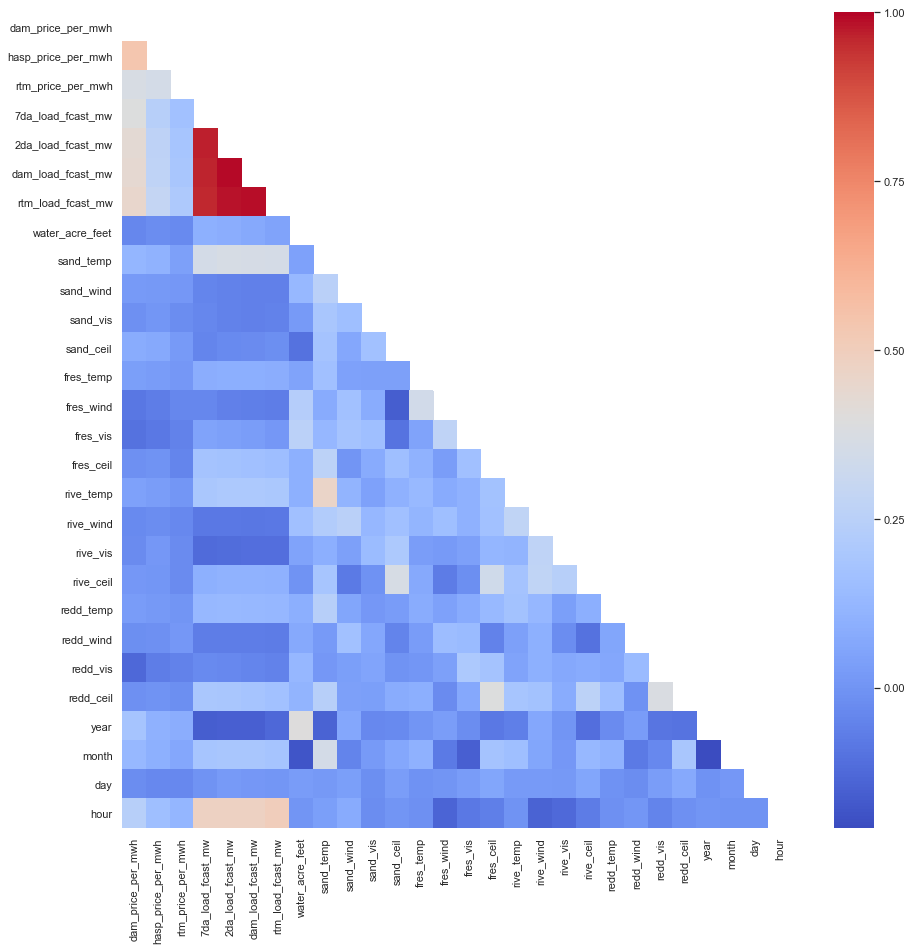

In [15]:
plt.figure(figsize=(15,15))
sns.set(font_scale=1)

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(df.corr(), mask=mask, annot=False, cmap='coolwarm')
plt.savefig('../images/corr_heatmap.jpg', bbox_inches='tight')
;

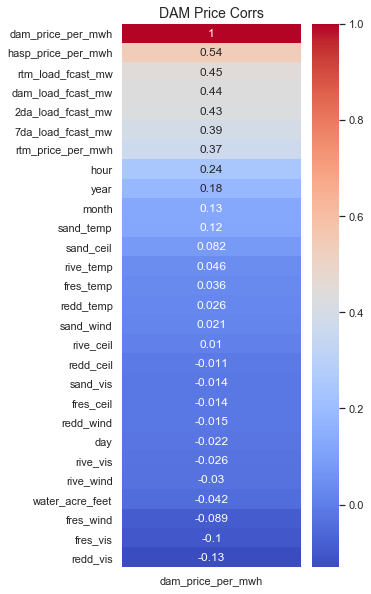

In [12]:
plt.figure(figsize=(4,10))
sns.set(font_scale=1)
sns.heatmap(df.corr()[['dam_price_per_mwh']].sort_values('dam_price_per_mwh', ascending=False),
            annot=True,
            cmap='coolwarm');
plt.title('DAM Price Corrs', fontsize=14)
plt.savefig('../images/dam_corr_heatmap.jpg', bbox_inches='tight')
plt.show();

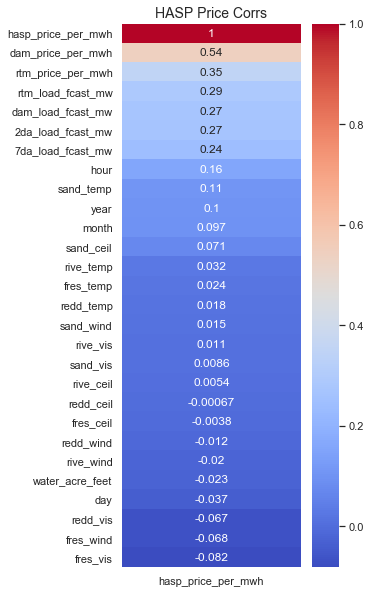

In [13]:
plt.figure(figsize=(4,10))
sns.set(font_scale=1)
sns.heatmap(df.corr()[['hasp_price_per_mwh']].sort_values('hasp_price_per_mwh', ascending=False),
            annot=True,
            cmap='coolwarm');
plt.title('HASP Price Corrs', fontsize=14)
plt.savefig('../images/hasp_corr_heatmap.jpg', bbox_inches='tight')
plt.show();

---

## Income For a 1 MW Power Plant

In [36]:
time_horiz_yrs = (df.index[-1] - df.index[0]) / timedelta(days=365)

print(time_horiz_yrs)

3.331164383561644


In [37]:
dam_ann_inc_1mw  = df.dam_price_per_mwh.sum() / time_horiz_yrs
hasp_ann_inc_1mw = df.hasp_price_per_mwh.sum() / time_horiz_yrs